# DNA Assembly

## Librerías

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

## Instrucciones
- Construcción del grafo de Brujin
- Determinación de un camino o ciclo euleriano
- Reconstrucción de la secuencia original
- Manejo de casos erróneos

In [4]:
class DeBruijnGraph:
    def __init__(self, fragments):
        self.fragments = fragments
        self.graph = nx.DiGraph()
        self._build_graph()

    def _build_graph(self):
        for fragment, prefix, suffix in self.fragments:
            self.graph.add_edge(prefix, suffix, label=fragment)

    def visualize_graph(self):
        plt.figure(figsize=(12, 10))
        pos = nx.spring_layout(self.graph, k=2.0, seed=42)
        nx.draw(self.graph, pos, with_labels=True, node_color="lightblue", node_size=2000,
                font_size=10, font_weight="bold", arrows=True)
        
        edge_labels = {(prefix, suffix): fragment for fragment, prefix, suffix in self.fragments}
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels, font_size=8, font_color="red",
                                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))  # Desplaza ligeramente las etiquetas
        
        plt.title("Grafo de De Bruijn")
        plt.show()

    def check_eulerian_conditions(self):
        in_degrees = {node: self.graph.in_degree(node) for node in self.graph.nodes()}
        out_degrees = {node: self.graph.out_degree(node) for node in self.graph.nodes()}
        start_node, end_node = None, None
        balance = {node: out_degrees[node] - in_degrees[node] for node in self.graph.nodes()}
        conflicting_fragments = []

        for node in self.graph.nodes():
            if start_node is None and balance[node] == 1:
                start_node = node
            elif end_node is None and balance[node] == -1:
                end_node = node
            elif balance[node] != 0:
                conflicting_fragments.append(node)

        if start_node is None and end_node is None:
            return "cycle", None, None, conflicting_fragments  # Ciclo Euleriano
        elif start_node is not None and end_node is not None:
            return "path", start_node, end_node, conflicting_fragments  # Camino Euleriano
        else:
            return False, None, None, conflicting_fragments

    def is_weakly_connected(self):
        return nx.is_weakly_connected(self.graph)

    def assemble_sequence(self):
        try:
            if not self.is_weakly_connected():
                raise nx.NetworkXError("El grafo no está débilmente conectado.")

            result, start_node, end_node, conflicting_fragments = self.check_eulerian_conditions()

            if result == "cycle":
                eulerian_path = list(nx.eulerian_circuit(self.graph))
                print("El grafo tiene un ciclo Euleriano.")
            elif result == "path":
                eulerian_path = list(nx.eulerian_path(self.graph, source=start_node))
                print("El grafo tiene un camino Euleriano.")
            else:
                raise nx.NetworkXError("Error en encontrar un camino Euleriano.")

            if eulerian_path:
                assembled_sequence = eulerian_path[0][0]
                for _, suffix in eulerian_path:
                    assembled_sequence += suffix[-1]

                print("Camino seguido:")
                for edge in eulerian_path:
                    print(f"{edge[0]} → {edge[1]}")

                print("\nSecuencia ensamblada de ADN:")
                print(assembled_sequence)

        except nx.NetworkXError as e:
            print(f"Error en el grafo: {e}")
            print("No se puede encontrar un camino o ciclo Euleriano: El grafo no cumple con las condiciones necesarias.")
            if not self.is_weakly_connected():
                print("=> El grafo no es débilmente conectado. Se debe verificar que todos los nodos estén conectadas.")
            elif conflicting_fragments:
                print("=> Inconsistencia en grados de entrada y salida")
                if start_node and end_node:
                    print(f"Nodo inicial sugerido: {start_node}, Nodo final sugerido: {end_node}")
                print("Fragmentos conflictivos (nodos con discrepancias de grado):")
                for fragment in conflicting_fragments:
                    print(f"Nodo: {fragment} - Grados: Entrada {self.graph.in_degree(fragment)}, Salida {self.graph.out_degree(fragment)}")

## Implementación con distintos casos

### Ejercicio 4 con camino euleriano

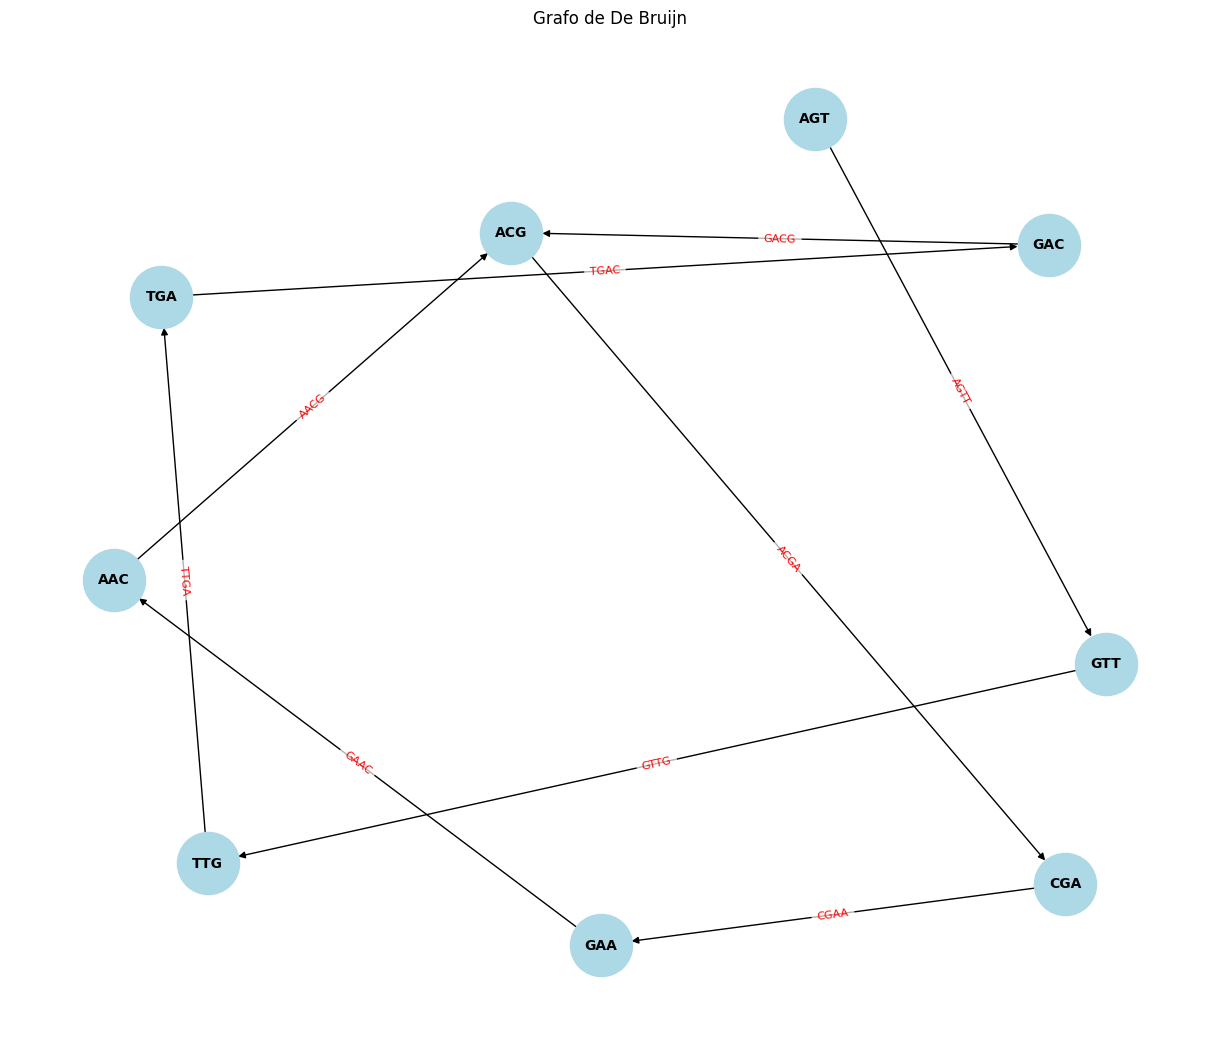

El grafo tiene un camino Euleriano.
Camino seguido:
AGT → GTT
GTT → TTG
TTG → TGA
TGA → GAC
GAC → ACG
ACG → CGA
CGA → GAA
GAA → AAC
AAC → ACG

Secuencia ensamblada de ADN:
AGTTGACGAACG


In [5]:
fragments_ej4 = [
    ("AGTT", "AGT", "GTT"),
    ("GTTG", "GTT", "TTG"),
    ("TTGA", "TTG", "TGA"),
    ("TGAC", "TGA", "GAC"),
    ("GACG", "GAC", "ACG"),
    ("ACGA", "ACG", "CGA"),
    ("CGAA", "CGA", "GAA"),
    ("GAAC", "GAA", "AAC"),
    ("AACG", "AAC", "ACG")
]

de_bruijn_graph = DeBruijnGraph(fragments_ej4)
de_bruijn_graph.visualize_graph()
de_bruijn_graph.assemble_sequence()

### Ejercicio 1 con ciclo euleriano

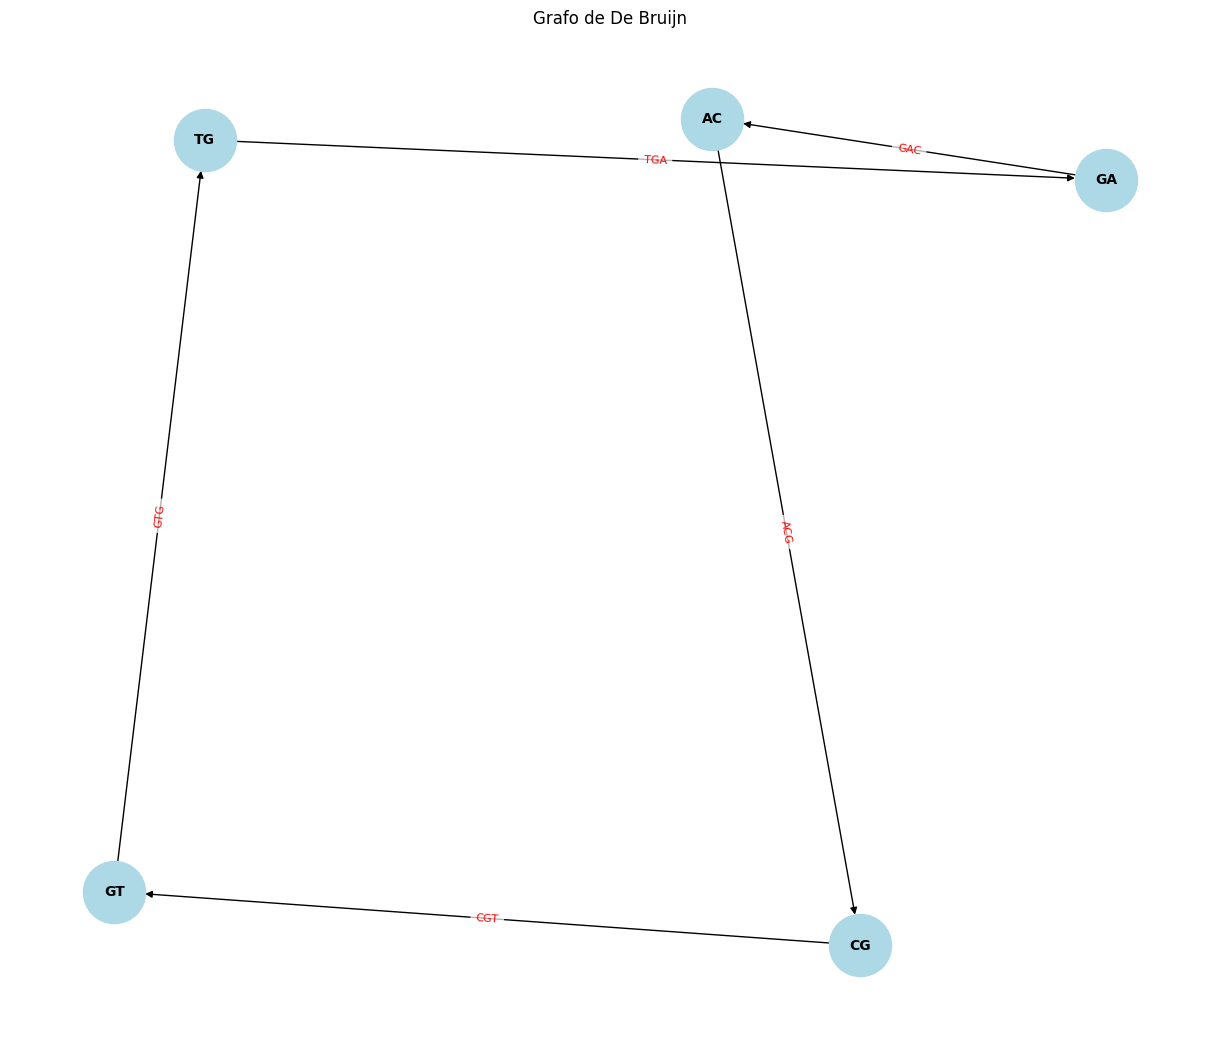

El grafo tiene un ciclo Euleriano.
Camino seguido:
AC → CG
CG → GT
GT → TG
TG → GA
GA → AC

Secuencia ensamblada de ADN:
ACGTGAC


In [6]:
fragments_ej1 = [
    ("ACG", "AC", "CG"),
    ("CGT", "CG", "GT"),
    ("GTG", "GT", "TG"),
    ("TGA", "TG", "GA"),
    ("GAC", "GA", "AC")
]

de_bruijn_graph = DeBruijnGraph(fragments_ej1)
de_bruijn_graph.visualize_graph()
de_bruijn_graph.assemble_sequence()

### Ejercicio 2 (grafo no conectado para k=4)

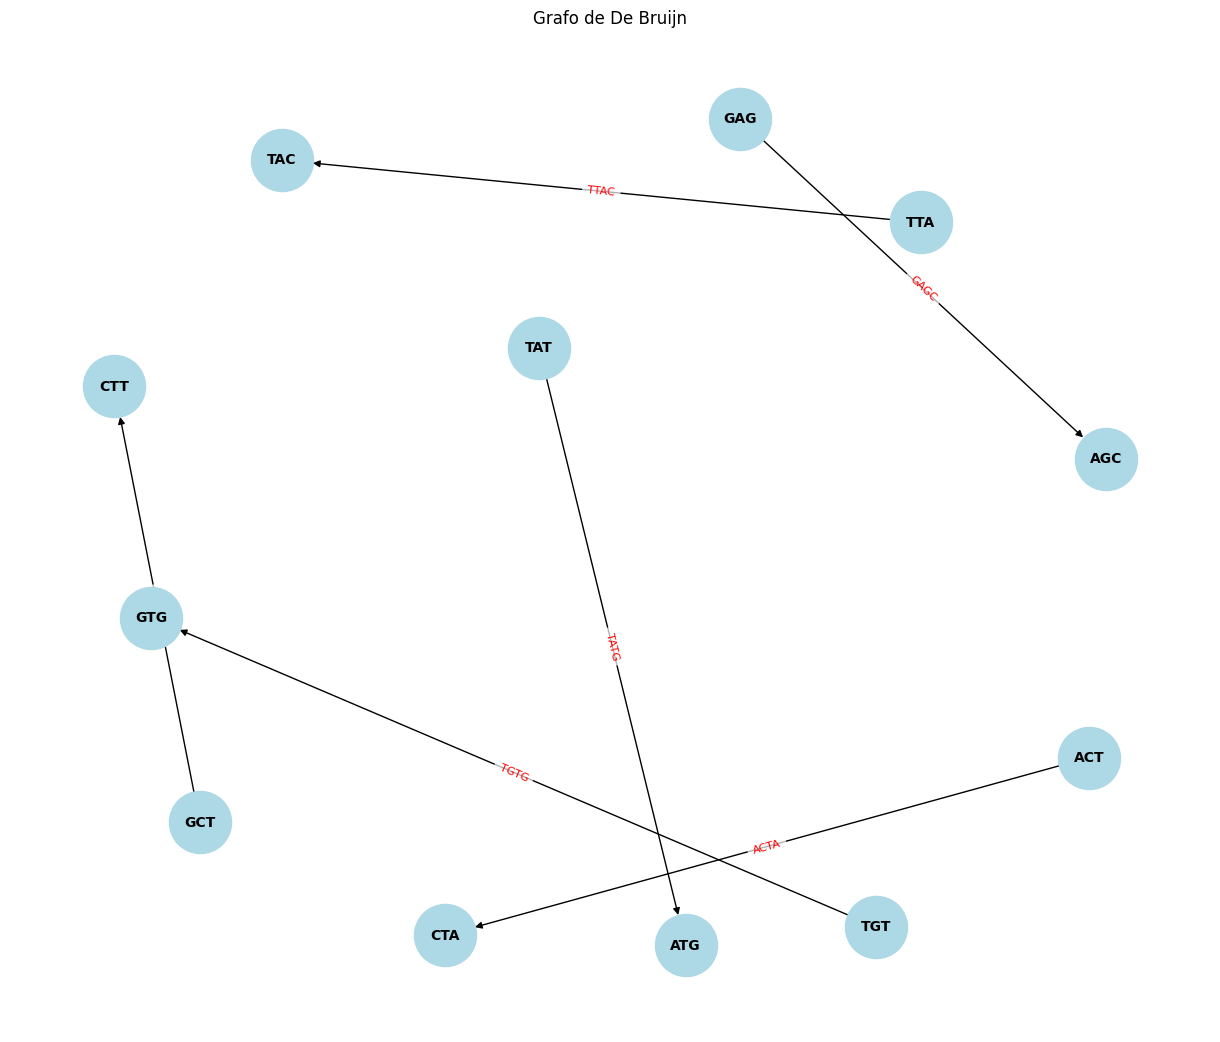

Error en el grafo: El grafo no está débilmente conectado.
No se puede encontrar un camino o ciclo Euleriano: El grafo no cumple con las condiciones necesarias.
=> El grafo no es débilmente conectado. Se debe verificar que todos los nodos estén conectadas.


In [7]:
fragments_ej2 = [
    ("GAGC", "GAG", "AGC"),
    ("GCTT", "GCT", "CTT"),
    ("TTAC", "TTA", "TAC"),
    ("ACTA", "ACT", "CTA"),
    ("TATG", "TAT", "ATG"),
    ("TGTG", "TGT", "GTG")
]

de_bruijn_graph = DeBruijnGraph(fragments_ej2)
de_bruijn_graph.visualize_graph()
de_bruijn_graph.assemble_sequence()

### Ejercicio 3 con una inconsistencia de grados añadida

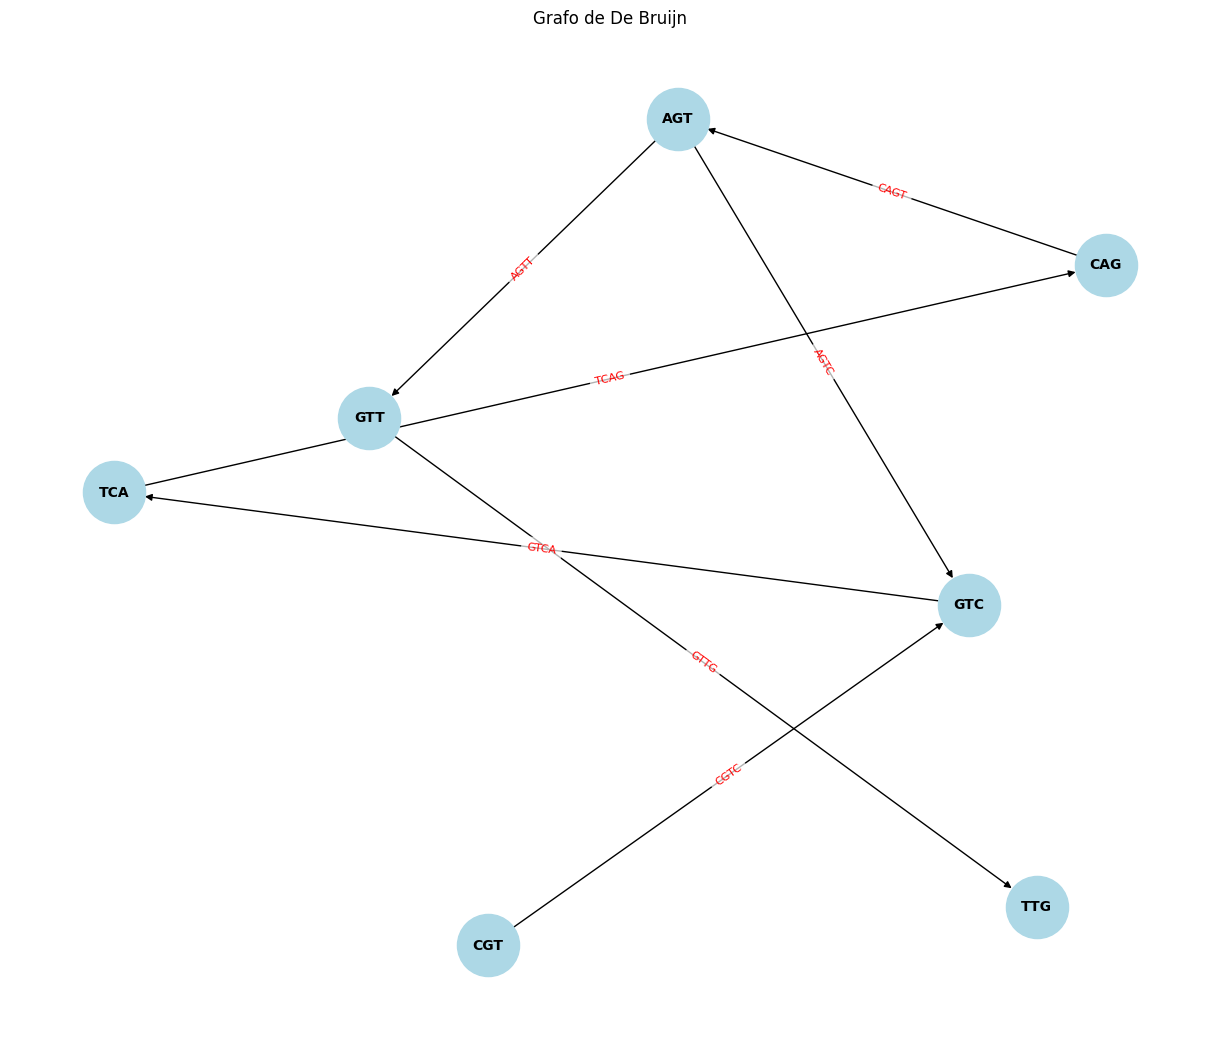

Error en el grafo: Graph has no Eulerian paths.
No se puede encontrar un camino o ciclo Euleriano: El grafo no cumple con las condiciones necesarias.
=> Inconsistencia en grados de entrada y salida
Nodo inicial sugerido: AGT, Nodo final sugerido: GTC
Fragmentos conflictivos (nodos con discrepancias de grado):
Nodo: CGT - Grados: Entrada 0, Salida 1
Nodo: TTG - Grados: Entrada 1, Salida 0


In [8]:
fragments_ej3_inconsistencia = [
    ("AGTC", "AGT", "GTC"),
    ("CGTC", "CGT", "GTC"),
    ("GTCA", "GTC", "TCA"),
    ("TCAG", "TCA", "CAG"),
    ("CAGT", "CAG", "AGT"),
    ("AGTT", "AGT", "GTT"),
    ("GTTG", "GTT", "TTG")
]

de_bruijn_graph = DeBruijnGraph(fragments_ej3_inconsistencia)
de_bruijn_graph.visualize_graph()
de_bruijn_graph.assemble_sequence()